# Covid19 Data Analysis Notebook
------------------------------------------

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


# COVID-19 Confirmed Cases

#### Importing the <b>covid19 dataset</b>



In [2]:
covid19_df = pd.read_csv("Data/covid19_Confirmed_dataset.csv")
covid19_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
covid19_df.shape

(266, 104)

#### deleting the useless columns

In [4]:
covid19_df.drop(['Lat', 'Long'], axis=1, inplace=True)
covid19_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### aggregating the rows by the country

In [5]:
covid19_df_agg = covid19_df.groupby('Country/Region').sum()
covid19_df_agg.drop('Province/State', axis = 1, inplace = True)
covid19_df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Visualizing data related to <i>China</i> and <i>Italy</i>

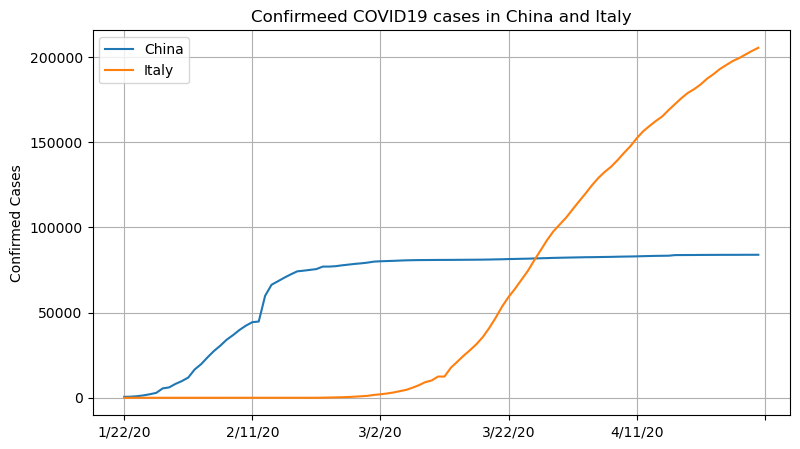

In [6]:
plt.figure(figsize=(9,5))
covid19_df_agg.loc['China'].plot()
covid19_df_agg.loc['Italy'].plot()
plt.title('Confirmeed COVID19 cases in China and Italy')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid()

### No. of cases in the first week in <i>China</i>

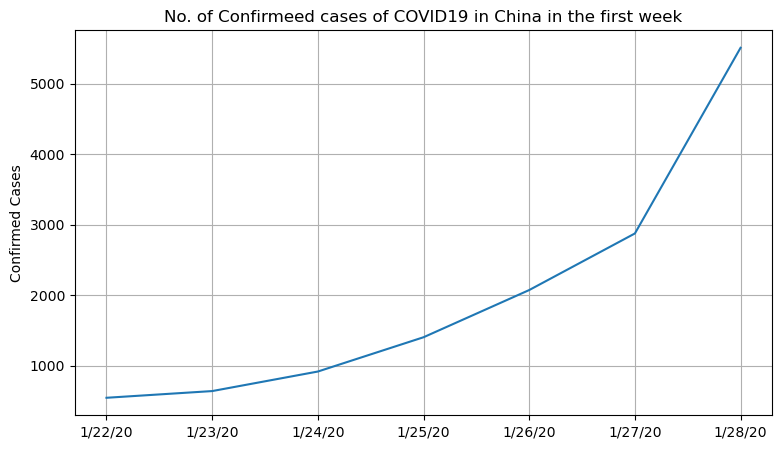

In [7]:
plt.figure(figsize = (9,5))
covid19_df_agg.loc['China'][:7].plot()
plt.title('No. of Confirmeed cases of COVID19 in China in the first week')
plt.ylabel('Confirmed Cases')
plt.grid()

### Calculating a good measure describing the spread of the virus.

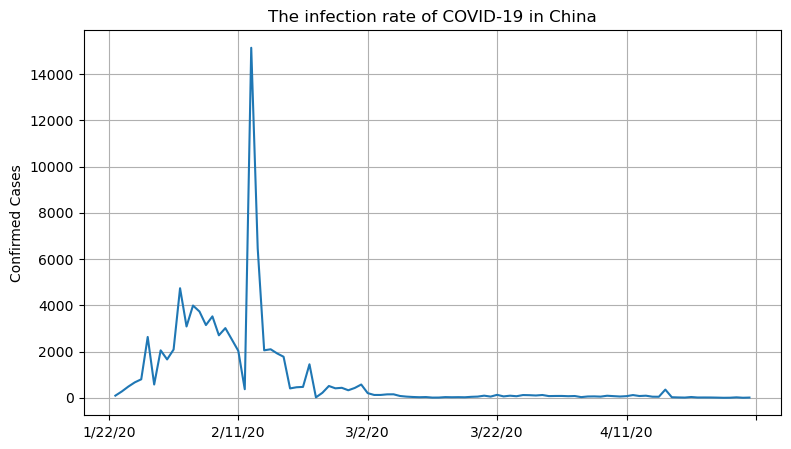

In [8]:
plt.figure(figsize = (9,5))
covid19_df_agg.loc['China'].diff().plot()
plt.title('The infection rate of COVID-19 in China')
plt.ylabel('Confirmed Cases')
plt.grid()

### Finding the <b>maxmimum infection rate</b> for <i>China</i>

In [9]:
### finding the maximum infection rate in China
max_Ch = covid19_df_agg.loc['China'].diff().max()
print('Maxim no. of Confirmed cases of COVID-19 in China: ', max_Ch)

Maxim no. of Confirmed cases of COVID-19 in China:  15136.0


### Finding <b>maximum infection rate</b> for all of the countries. 

In [10]:
countries = list(covid19_df_agg.index)
max_infection_rates = [covid19_df_agg.loc[c].diff().max() for c in countries ]
covid19_df_agg['Maximum Infection Rate'] = max_infection_rates
max_infection_rates_df = pd.DataFrame(covid19_df_agg['Maximum Infection Rate'])
max_infection_rates_df.head()

,Maximum Infection Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


# COVID-19 Confirmed Deaths

In [11]:
covid19_deaths_df = pd.read_csv('Data/covid19_deaths_dataset.csv')
covid19_deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


#### deleting the useless columns

In [12]:
covid19_deaths_df.drop(['Lat', 'Long'], axis=1, inplace=True)
covid19_deaths_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


### aggregating the rows by the country

In [13]:
covid19_deaths_df_agg = covid19_deaths_df.groupby('Country/Region').sum()
covid19_deaths_df_agg.drop('Province/State', axis = 1, inplace = True)
covid19_deaths_df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


### <b>No. of COVID-19 Deaths</b> vs <b>No. of CCOVID-19 Cases</b> in <i>China</i>

In [14]:
### Droping the 'Maximum Infection Rate' from covid19_df_agg
covid19_df_agg.drop(['Maximum Infection Rate'], axis = 1, inplace = True)

In [17]:
#reshape the confirmed cases DataFrame to have dates in a single column
confirmed_melted = covid19_df_agg.melt(var_name='Date', value_name='Confirmed Cases', ignore_index = False)
confirmed_melted['Date'] = pd.to_datetime(confirmed_melted['Date'])

#reshape the deaths DataFrame to have dates in a single column
deaths_melted = covid19_deaths_df_agg.melt(var_name='Date', value_name='Deaths', ignore_index=False)
deaths_melted['Date'] = pd.to_datetime(deaths_melted['Date'])

# Merge the two dataframes on the Date and Country/Region columns
merged_df = pd.merge(confirmed_melted, deaths_melted, on=['Date', 'Country/Region'])
merged_df.head()

/var/folders/vs/v61gwhhn7c939kjnl5kdlwbr0000gn/T/ipykernel_27813/253061261.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_melted['Date'] = pd.to_datetime(confirmed_melted['Date'])
/var/folders/vs/v61gwhhn7c939kjnl5kdlwbr0000gn/T/ipykernel_27813/253061261.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_melted['Date'] = pd.to_datetime(deaths_melted['Date'])


,Date,Confirmed Cases,Deaths
Country/Region,,,
Afghanistan,2020-01-22,0,0
Albania,2020-01-22,0,0
Algeria,2020-01-22,0,0
Andorra,2020-01-22,0,0
Angola,2020-01-22,0,0


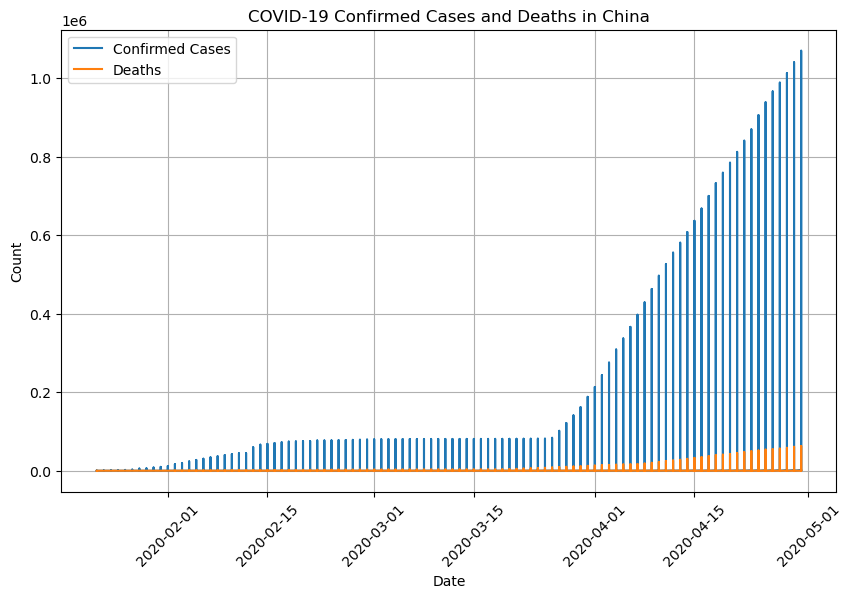

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Confirmed Cases'], label='Confirmed Cases')
plt.plot(merged_df['Date'], merged_df['Deaths'], label='Deaths')

plt.title('COVID-19 Confirmed Cases and Deaths in China')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Worldwide Hapiness Report and COVID-19 Infection Rate

### Importing the dataset for <b>happiness report</b>

In [ ]:
happiness_report_df = pd.read_csv('Data/worldwide_happiness_report.csv')
happiness_report_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
happiness_report_df.shape

(156, 9)

#### deleting the useless columns

In [ ]:
happiness_report_df.drop(['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption'], axis=1, inplace=True)
happiness_report_df.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


#### changing the indices of the dataframe

In [ ]:
happiness_report_df.set_index('Country or region', inplace=True)
happiness_report_df.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Joining the two datasets: <b>COVID-19</b> and <b>Worldwide Hapiness</b>

In [ ]:
joined_data = max_infection_rates_df.join(happiness_report_df, how='inner')
joined_data.head()

,Maximum Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Correlation matrix 

In [ ]:
joined_data.corr()

,Maximum Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Maximum Infection Rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Visualization of correlation between <b>COVID-19</b> and <b>Worldwide Happiness</b>

### 1. <b>GDP</b> vs <b>Maximum Infection Rate</b>

<Axes: xlabel='GDP per capita', ylabel='Maximum Infection Rate'>

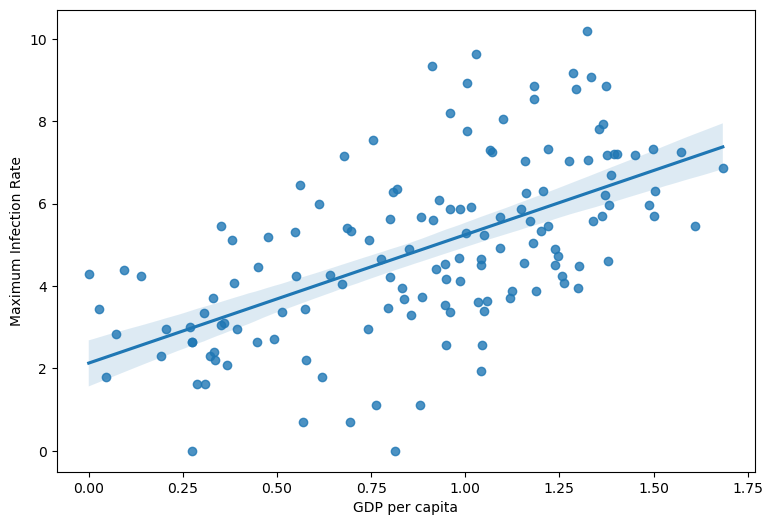

In [ ]:
x = joined_data['GDP per capita']
y = np.log(joined_data['Maximum Infection Rate'])
plt.figure(figsize = (9,6))
sns.regplot(x=x, y=y)

### 2. <b>Social support</b> vs <b>Maximum Infection rate</b>

<Axes: xlabel='Social support', ylabel='Maximum Infection Rate'>

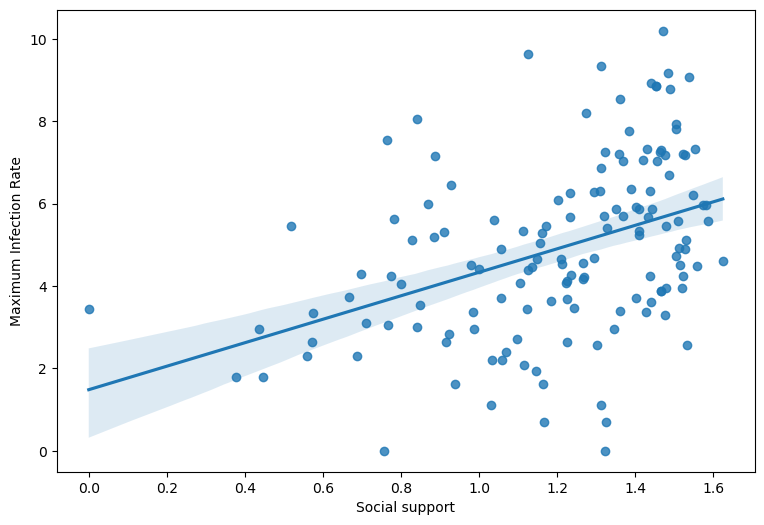

In [ ]:
x = joined_data['Social support']
y = np.log(joined_data['Maximum Infection Rate'])
plt.figure(figsize = (9,6))
sns.regplot(x=x, y=y)

### 3. <b>Healthy life expectancy</b> vs <b>Maximum Infection Rate</b>

<Axes: xlabel='Healthy life expectancy', ylabel='Maximum Infection Rate'>

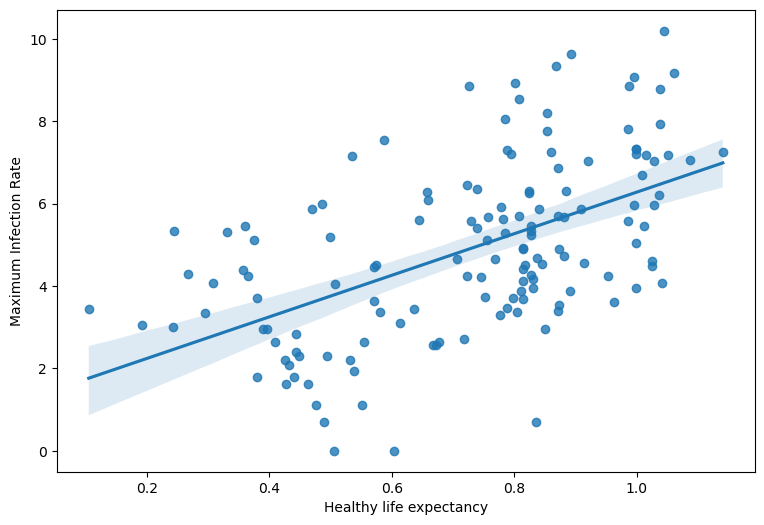

In [ ]:
x = joined_data['Healthy life expectancy']
y = np.log(joined_data['Maximum Infection Rate'])
plt.figure(figsize = (9,6))
sns.regplot(x=x, y=y)

### 4. <b>Freedom to make life choices</b> vs <b>Maximum Infection Rate</b>

<Axes: xlabel='Freedom to make life choices', ylabel='Maximum Infection Rate'>

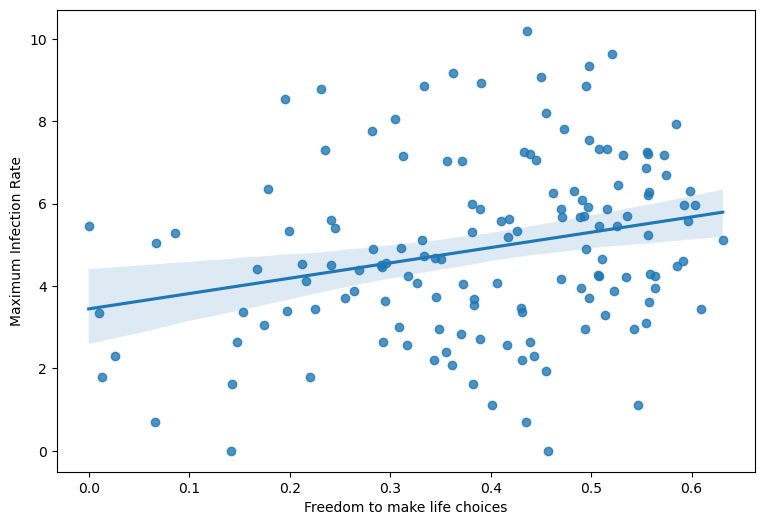

In [ ]:
x = joined_data['Freedom to make life choices']
y = np.log(joined_data['Maximum Infection Rate'])
plt.figure(figsize = (9,6))
sns.regplot(x=x, y=y)